In [2]:
import pandas as pd
from pandas import Series,DataFrame

In [3]:
titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


All good data analysis projects begin with trying to answer questions. 
Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:
1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?


Then we'll dig deeper, with a broader question:
5.) What factors helped someone survive the sinking?



the first Question: Who were the passengers on the titanic?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

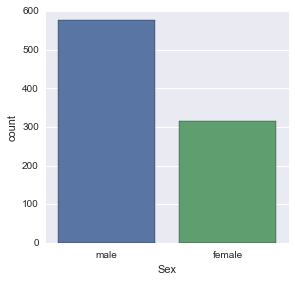

In [6]:
# Let's first check gender
sns.factorplot('Sex',data=titanic_df,kind='count')

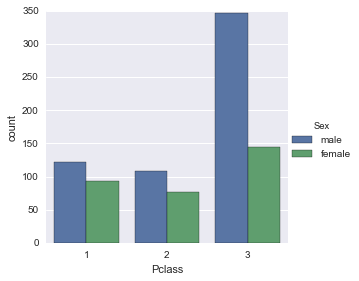

In [7]:
# Now let's seperate the genders by classes
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='Sex')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, 
it might be useful to know the split between males,females,and children. How can we go about this?

In [8]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


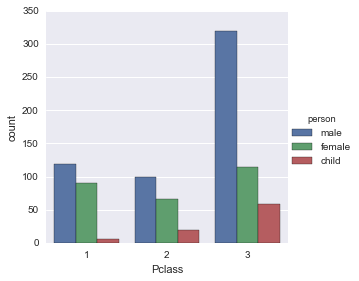

In [9]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')

Interesting, quite a bit of children in 3rd class and not so many in 1st! 
How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

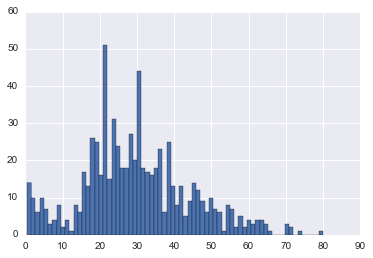

In [10]:
titanic_df['Age'].hist(bins=70)

In [11]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

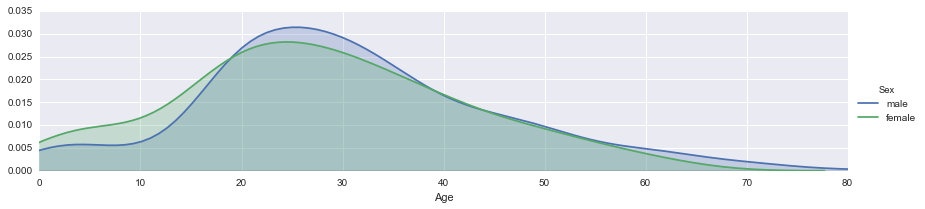

In [12]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

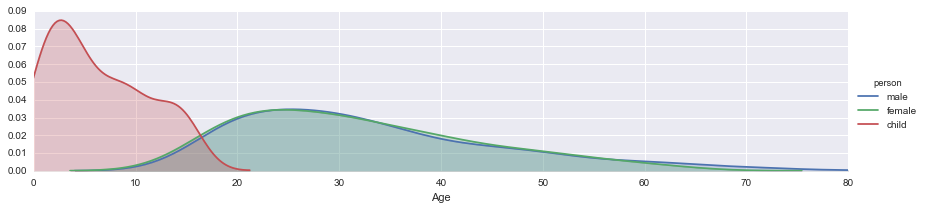

In [13]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

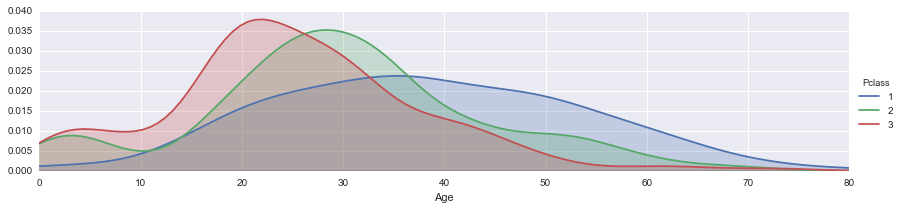

In [14]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


So we can see that the Cabin column has information on the deck, 
but it has several NaN values, so we'll have to drop them.

In [16]:
deck = titanic_df['Cabin'].dropna()

In [17]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

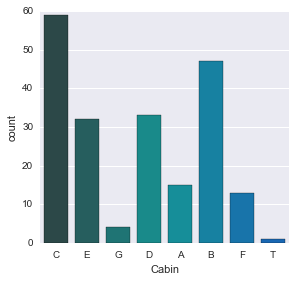

In [18]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,kind = 'count', palette = 'winter_d')

Interesting to note we have a 'T' deck value there which doesn't make sense, 
we can drop it out with the following code:

In [19]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

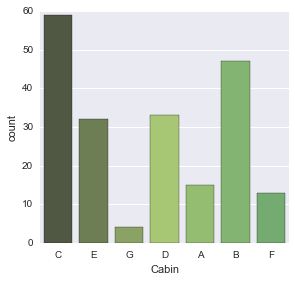

In [20]:
sns.factorplot('Cabin',data=cabin_df,kind = 'count', palette = 'summer_d')

In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on 
Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

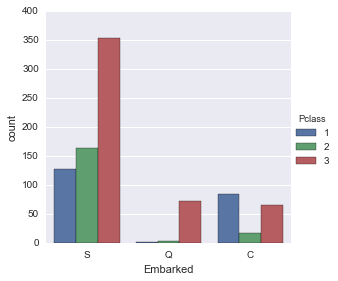

In [22]:
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass',order=['S','Q','C'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. 
It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:
4.) Who was alone and who was with family?

In [24]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [26]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger 
had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0
we know the passenger was with his/her family, otherwise they were alone.

In [28]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


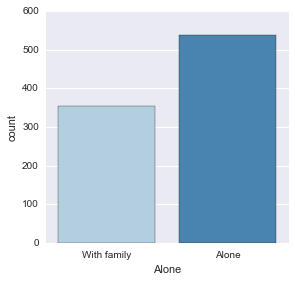

In [30]:
sns.factorplot('Alone',data=titanic_df,kind='count',palette='Blues')

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most 
interesting (and open-ended) question: What factors helped someone survive the sinking?

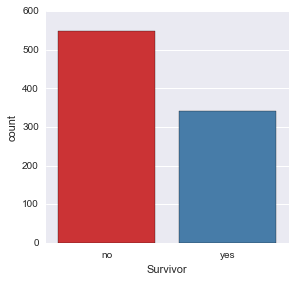

In [35]:
titanic_df["Survivor"]=titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot("Survivor",data=titanic_df,kind='count',palette='Set1')

So quite a few more people died than those who survived. Let's see if the class of the passengers 
had an effect on their survival rate, since the movie Titanic popularized the notion 
that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

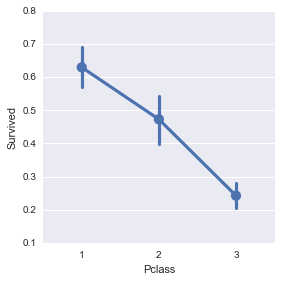

In [38]:
sns.factorplot(x='Pclass',y='Survived',data=titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused 
by the large amount of men in the 3rd class in combination with the women and children first policy. 
Let's use 'hue' to get a clearer picture on this.

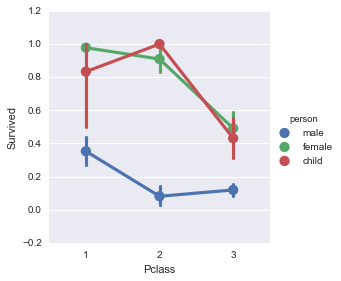

In [39]:
sns.factorplot(x='Pclass',y='Survived',hue='person',data=titanic_df)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. 
Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

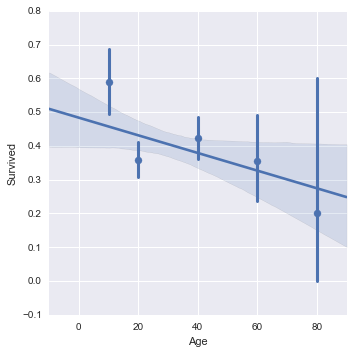

In [43]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',data=titanic_df,x_bins=generations)

Looks like there is a general trend that the older the passenger was, the less likely they survived. 
Let's go ahead and use hue to take a look at the effect of class and age.

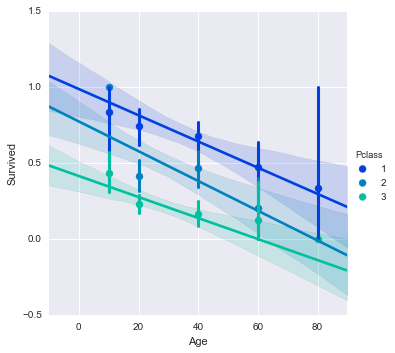

In [44]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',x_bins=generations,palette='winter')

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

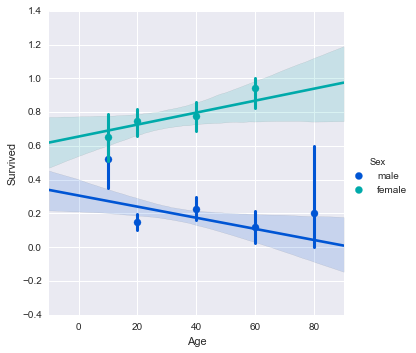

In [46]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',x_bins=generations,palette='winter')

Did the deck have an effect on the passengers survival rate?

In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [75]:
Cabin_Survival = titanic_df[['Cabin','Survived']].dropna(thresh=2)

In [83]:
levels = []

for level in Cabin_Survival['Cabin']:
    levels.append(level[0])
    
Cabin_Survival['Cabin'] = levels
Cabin_Survival['Cabin'] = Cabin_Survival.Cabin[Cabin_Survival['Cabin']!='T']

In [86]:
Cabin_Survival.head()

,Cabin,Survived
1,C,1
3,C,1
6,E,0
10,G,1
11,C,1


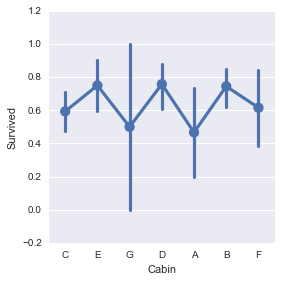

In [87]:
sns.factorplot('Cabin','Survived',data=Cabin_Survival)

Did having a family member increase the odds of surviving the crash?

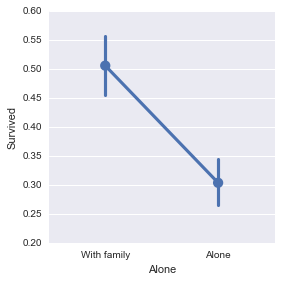

In [88]:
sns.factorplot('Alone','Survived',data=titanic_df)